1. Load the Data: Import the Boston Housing dataset from the sklearn library and convert it into a pandas DataFrame. The data is here

Hint: Use the pd.read_csv command and pass the url

2. Explore the Data - Use pandas, numpy and matplotlib to explore the dataset. Here are some specific tasks:

Use the df.describe() function to get a quick statistical summary of the data (mean, median, ect …)
Use df.head() to get the first few rows of the DataFrame.
Use df.info() to get a summary of the DataFrame, like how many entries there are, and what type of data each column holds.
Use matplotlib to visualize the data, matplotlib and seaborn can be used:
Create histograms for each column to visualize data distribution. For this, you can use plt.hist().
Create scatter plots comparing the house price (MEDV) o other variables to discern patterns. For this, use plt.scatter()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# URL to the Boston Housing dataset in CSV format
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(url)

summary = df.describe()
print("summary")
print(summary)
print("\nhead")
print(df.head())
print("\ninfo")
print(df.info())


summary
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861  

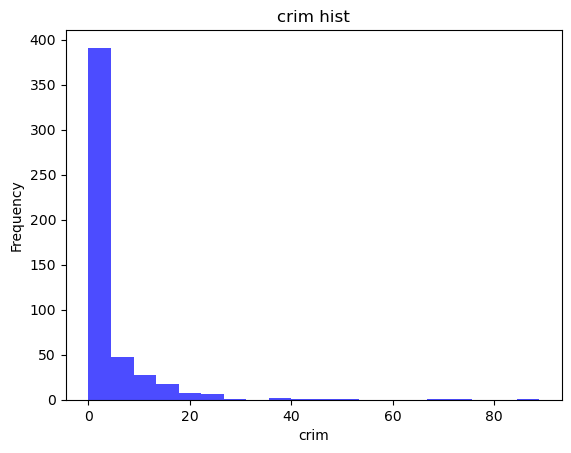

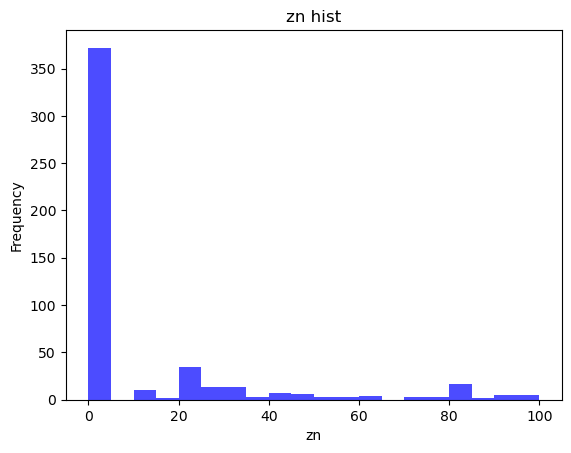

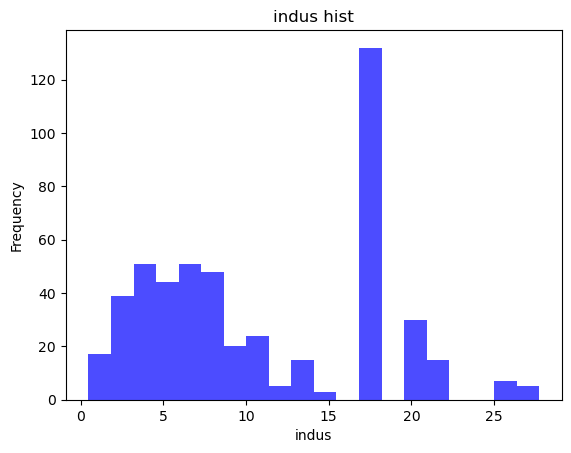

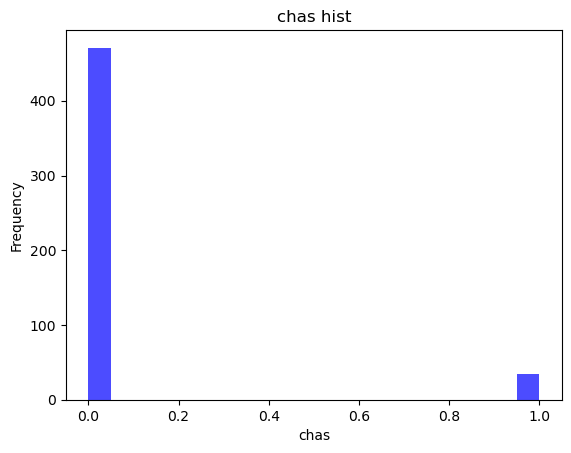

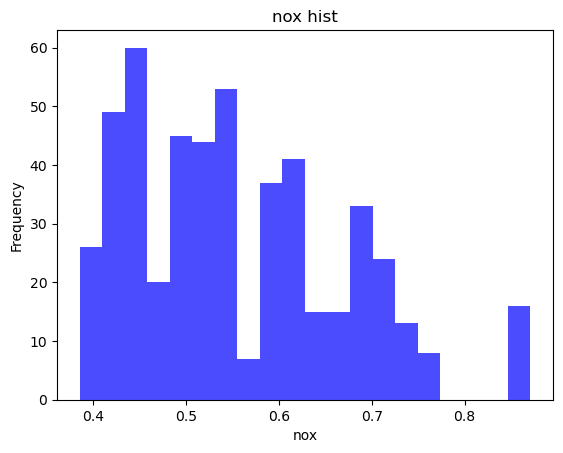

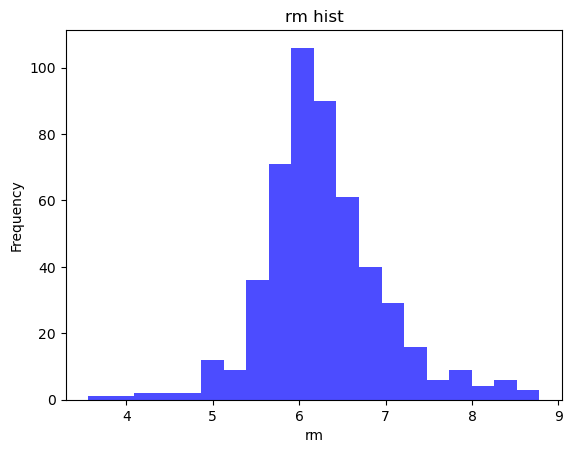

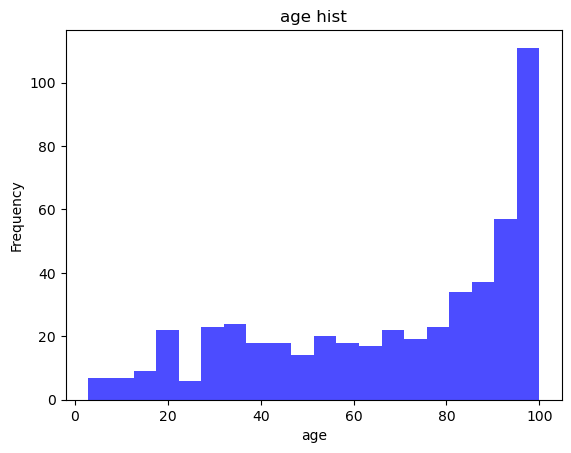

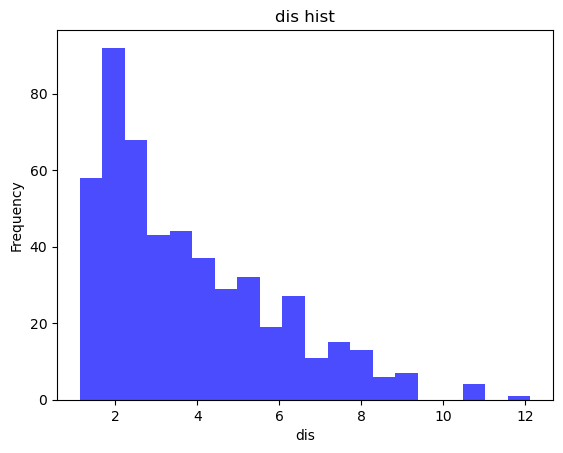

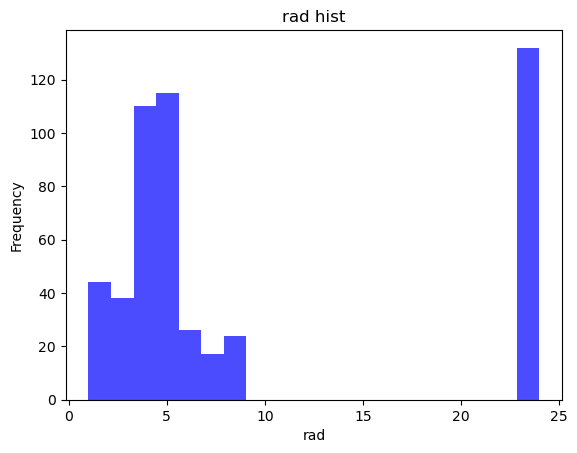

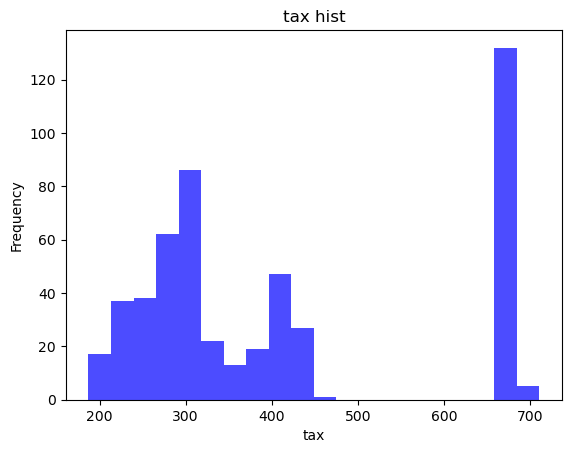

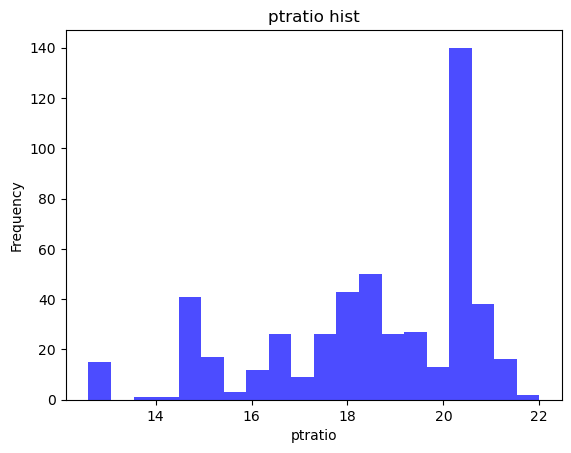

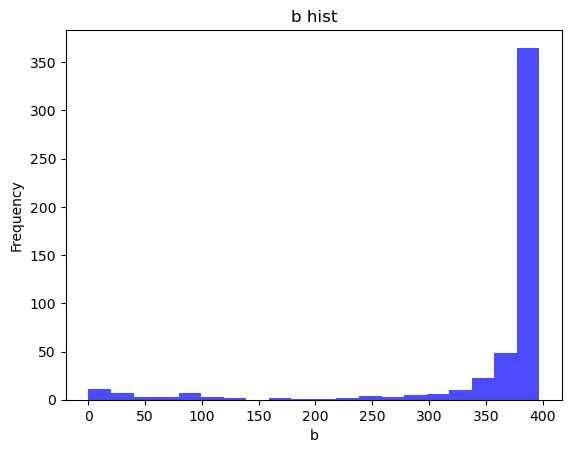

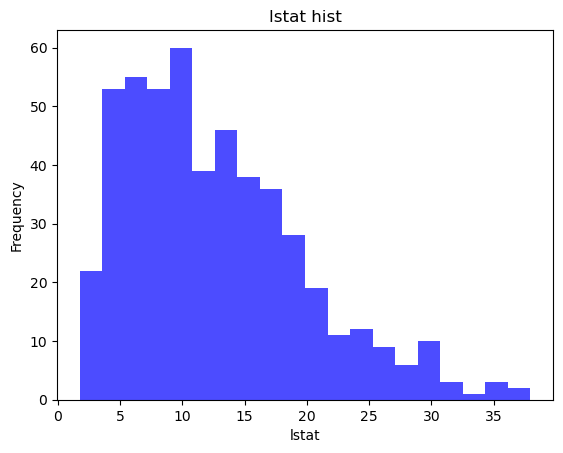

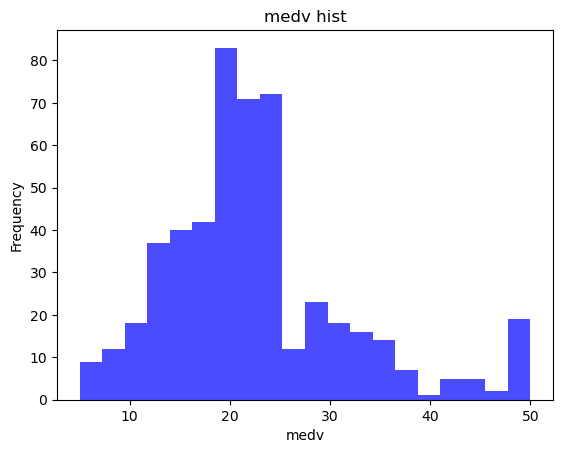

In [24]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'{column} hist')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

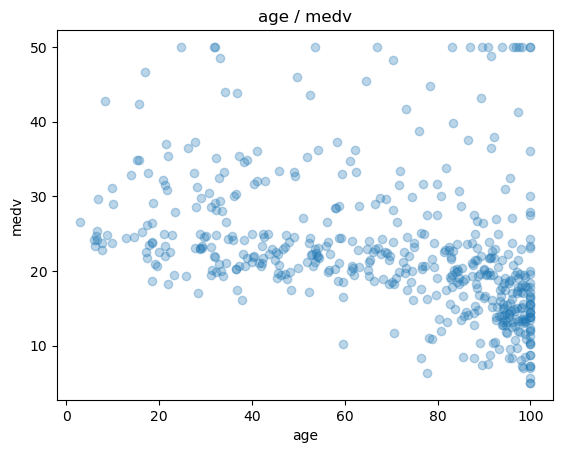

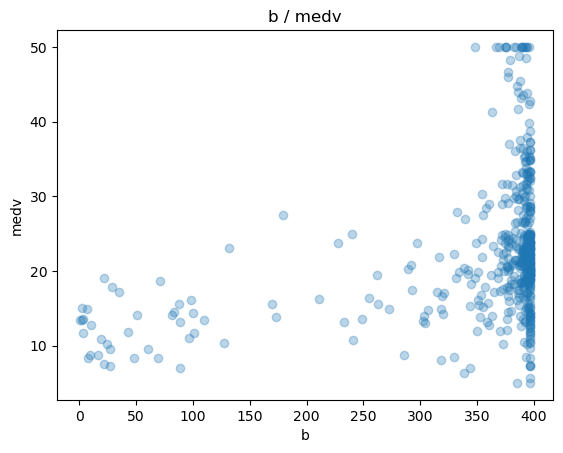

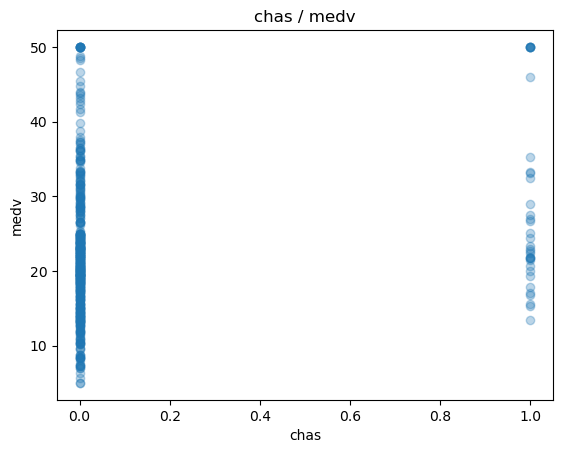

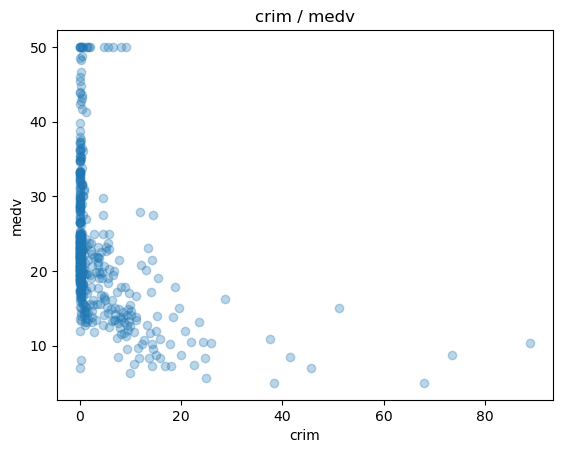

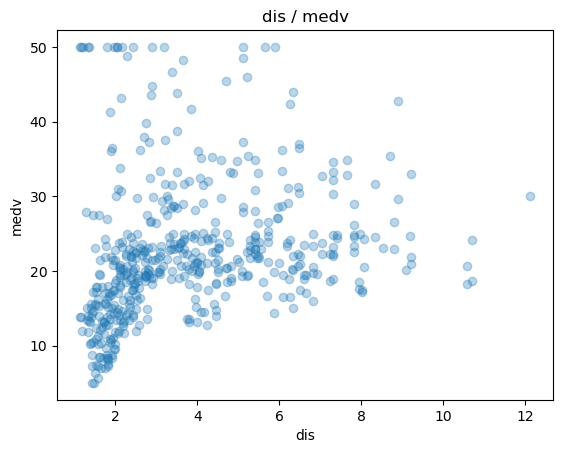

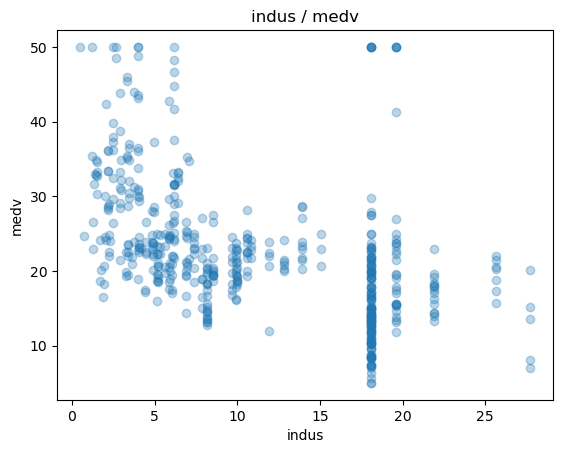

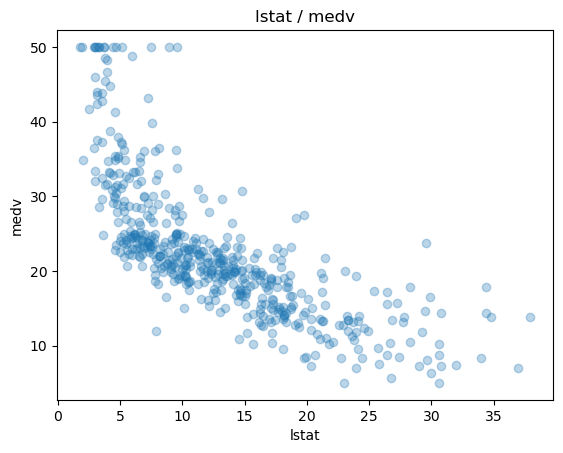

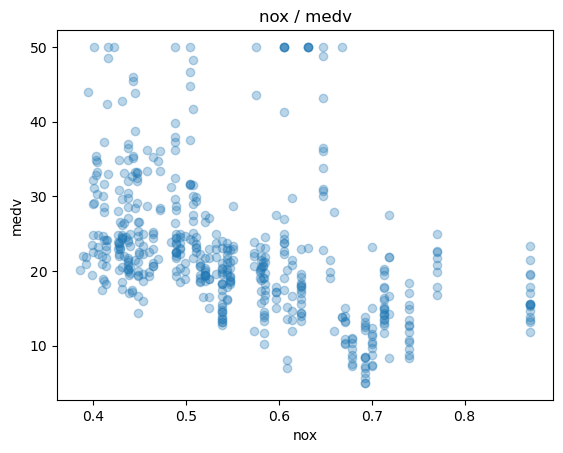

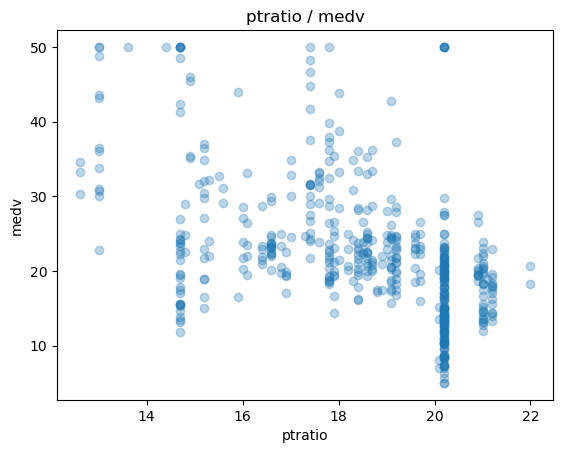

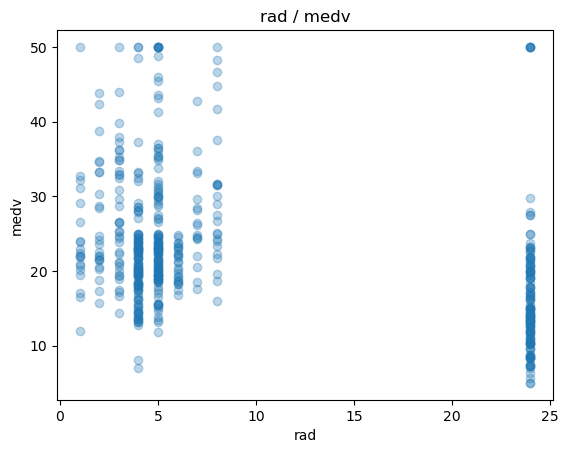

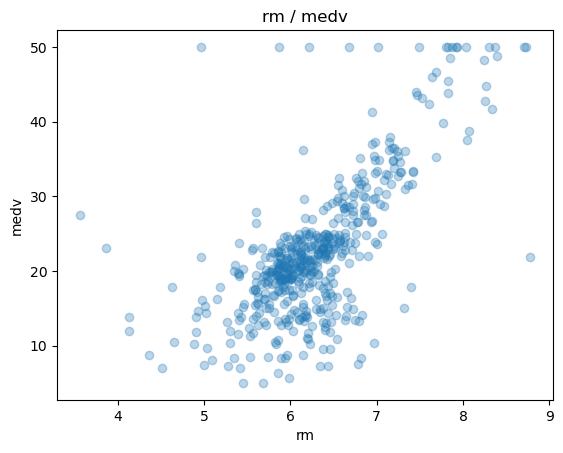

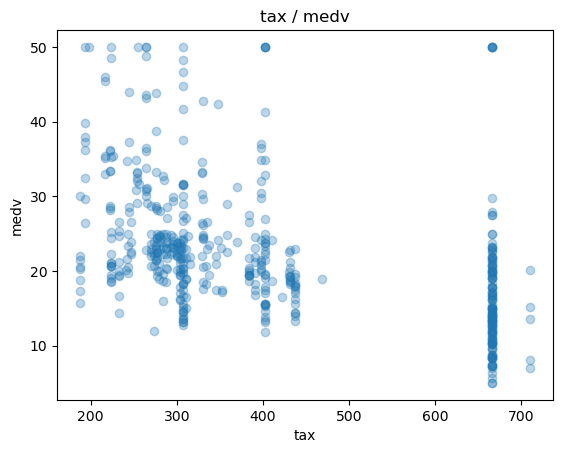

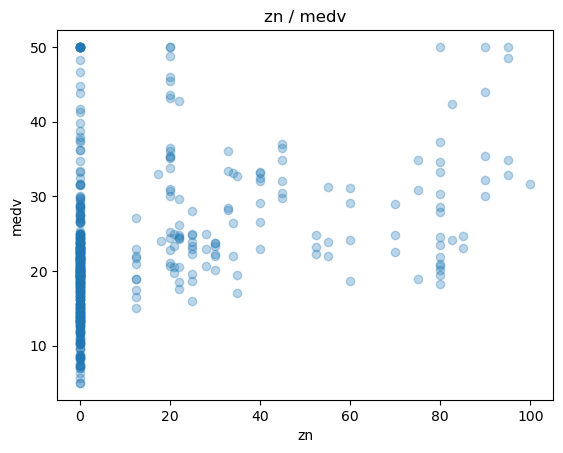

In [21]:
for column in df.columns.difference(['medv']):
    plt.figure()
    plt.scatter(df[column], df['medv'], alpha=0.3)
    plt.title(f'{column} / medv')
    plt.xlabel(column)
    plt.ylabel('medv')
    plt.show()

3. Preprocess the Data: Now, we need to make sure our data is clean and ready to use:

Identify and address any missing data:
Examine missing data using df.isnull().sum().
Determine how you’ll handle it—either by dropping or imputing.
Normalize continuous variables to standardize scales, ensuring easier comparisons. Hint: Utilize sklearn.preprocessing.MinMaxScaler().

In [44]:
missing_data_summary = df.isnull().sum()
print("missing_data_summary")
print(missing_data_summary)


# dropping of missing data
df_drop = df.dropna()
print(df_drop.head(10))

# imputing of missing data
df_imput = df.fillna(df.mean())
print(df_imput.head(10))

# Normalize continuous variables using MinMaxScaler
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Display the first few rows of the cleaned and normalized DataFrame
print("\nNormalized DF")
print(df_scale.head())

missing_data_summary
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0

4. Categorical Variables: The Boston Housing dataset doesn’t contain categorical variables (variables with set categories), but it’s useful to know how to handle them. Practice this by creating a fake categorical variable.

Hint: One way to do this is to divide the ‘AGE‘ column into categories (like ‘new’, ‘old’, ‘very old’) and then convert these categories into numbers using one-hot encoding (a way of representing categories as binary vectors).

In [49]:
bins = [0, 20, 40, df['age'].max()]
labels = ['new', 'old', 'very old']
df['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels)

df_encoded = pd.get_dummies(df, columns=['age_cat'], drop_first=True)

5. Correlations: See how much each variable affects the house price (MEDV). This is done by calculating the correlation matrix (a table showing correlation coefficients between variables).

Hint: You can use df.corr() to calculate the correlations, and sns.heatmap() to visualize them.

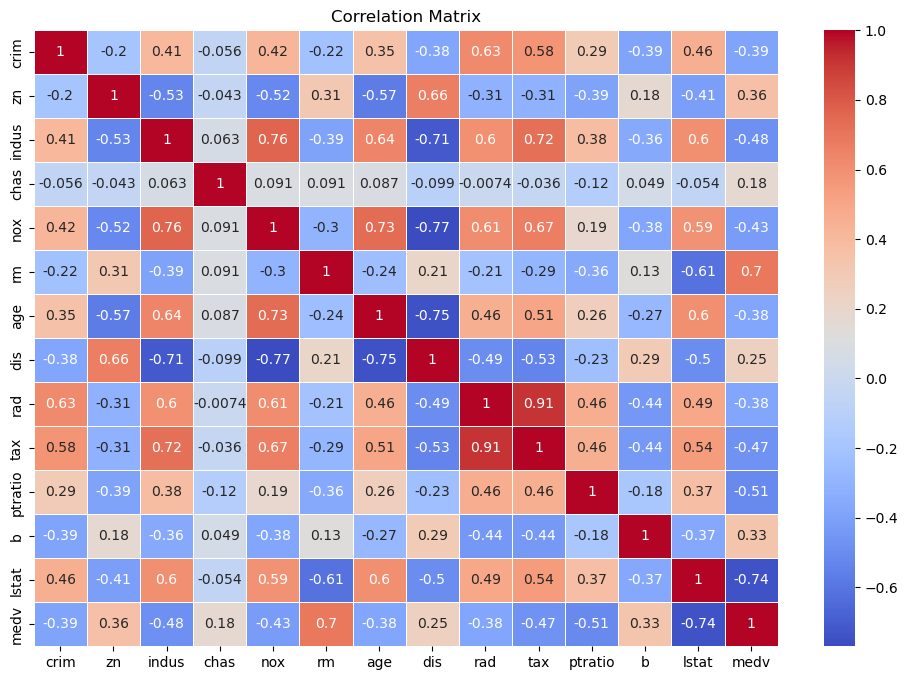

In [51]:
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

6. Feature Engineering: Create a new feature/column from the existing ones. This might enhance data understanding or prediction accuracy.

Hint: Consider a feature that multiplies “RM” (average number of rooms) by “LSTAT” (percentage of lower status population).

In [59]:
df['rm_lstat2'] = df['rm'] * df['lstat']

print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv age_category   age_cat  rm_lstat  
0  396.90   4.98  24.0     very old  very old  32.74350  
1  396.90   9.14  21.6     very old  very old  58.68794  
2  392.83   4.03  34.7     very old  very old  28.95555  
3  394.63   2.94  33.4     very old  very old  20.57412  
4  396.90   5.33  36.2     very old  very old  38.09351  


Part II
Instruction : Analyse the relationship between Property Age and Price

More Detailed Hints:

1. Boolean Indexing for Age Groups:
New: new_properties = df[df['AGE'] <= 35]
Old: old_properties = df[(df['AGE'] > 35) & (df['AGE'] <= 70)]
Very Old: very_old_properties = df[df['AGE'] > 70]

2. Plotting Histograms:
Plot property age vs. median value. Remember to label and title your charts using plt.xlabel(), plt.ylabel(), and plt.title().

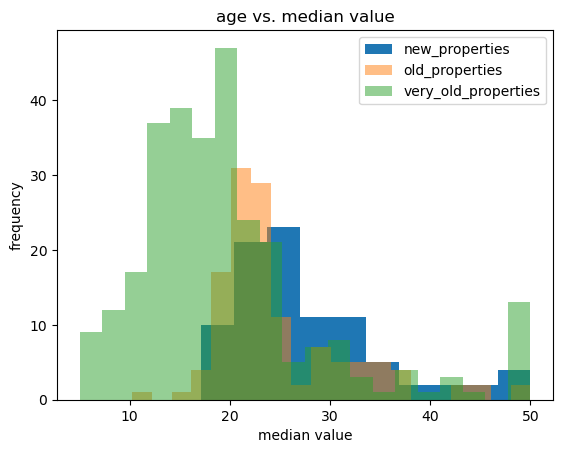

In [65]:
new_properties = df[df['age'] <= 35]
old_properties = df[(df['age'] > 35) & (df['age'] <= 70)]
very_old_properties = df[df['age'] > 70]

plt.figure()
plt.hist(new_properties['medv'], label='new_properties')
plt.hist(old_properties['medv'], bins=20, alpha=0.5, label='old_properties')
plt.hist(very_old_properties['medv'], bins=20, alpha=0.5, label='very_old_properties')
plt.xlabel('median value')
plt.ylabel('frequency')
plt.title('age vs. median value')
plt.legend()
plt.show()

Part III
Instruction : Analyse the Neighborhood Crime Rate Impact on Prices

More Detailed Hints:

1. Creating Binned Crime Rate:

Divide the crime rate into specific bins.
Hint: df['CRIM_BIN'] = pd.cut(df['CRIM'], bins=[0, 1, 5, 10, 20, max(df['CRIM'])], labels=['0-1', '1-5', '5-10', '10-20', '20+'])

2. Grouping by Binned Crime Rate:

After segmenting the crime rate, group by the new column and calculate the average MEDV.
Hint: avg_MEDV_per_CRIM_BIN = df.groupby('CRIM_BIN')['MEDV'].mean()

3. Plotting Line Plot:

Visualize the results. Don’t forget labeling and titling.

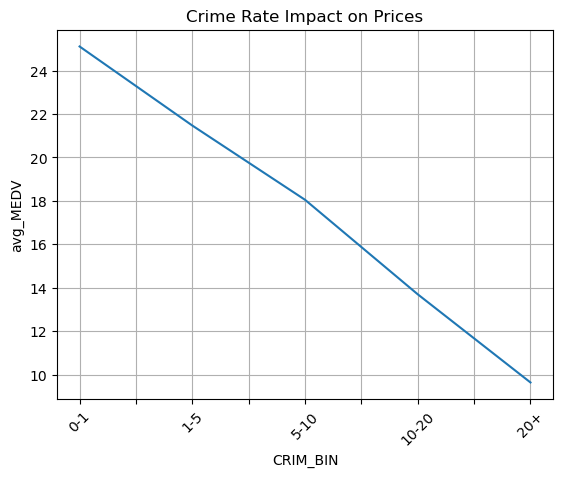

In [67]:
df['CRIM_BIN'] = pd.cut(df['crim'], bins=[0, 1, 5, 10, 20, df['crim'].max()], labels=['0-1', '1-5', '5-10', '10-20', '20+'])

# Group by Binned Crime Rate and calc the average MEDV
avg_MEDV_per_CRIM_BIN = df.groupby('CRIM_BIN')['medv'].mean()


plt.figure()
avg_MEDV_per_CRIM_BIN.plot()
plt.xlabel('CRIM_BIN')
plt.ylabel('avg_MEDV')
plt.title('Crime Rate Impact on Prices')
plt.xticks(rotation=45)
plt.grid()
plt.show()